## Step 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import latest versin of the data set 
path = r'C:\Users\dequw\Documents\Instacart Basket Analysis 12-23'
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [3]:
ords_prods_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,orders_interval,first_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
ords_prods_customers.shape

(32404859, 35)

###  Step 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Security Implication: This data set contains personally identifiable information (PII) for example: first name and last name of customers.


### Step 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
1) Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions); 
2) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

# Step 3.1 Create a 'region' column

In [5]:
# Create a new column
result = []

for value in ords_prods_customers["state"]:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        result.append("Northeast")
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        result.append("Midwest")
    elif value == 'Delaware' or value == 'Maryland' or value == 'Distinct of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Caroline' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        result.append("South")
    else:
        result.append("West")

In [6]:
# Create a new column 'region' within the dataframe and set it equal to result
ords_prods_customers['region'] = result

In [7]:
# Check the frequency of each region (and compare the sum of them with the total frequency)
ords_prods_customers['region'].value_counts()

region
West         9543362
South        9541436
Midwest      7597325
Northeast    5722736
Name: count, dtype: int64

In [8]:
# check whether new column are assigned
ords_prods_customers[['user_id', 'spending_flag', 'state', 'region']].head(100)

,user_id,spending_flag,state,region
0,1,Low spender,Alabama,South
1,1,Low spender,Alabama,South
2,1,Low spender,Alabama,South
3,1,Low spender,Alabama,South
4,1,Low spender,Alabama,South
...,...,...,...,...
95,15,Low spender,Indiana,Midwest
96,15,Low spender,Indiana,Midwest
97,15,Low spender,Indiana,Midwest
98,15,Low spender,Indiana,Midwest


# Step 3.2 Discover the difference in spending habits between the different U.S. regions.

In [9]:
# Create a dataframe to group the data by 'region' and 'spending_flag'
df_grouped = ords_prods_customers.groupby(['region', 'spending_flag']).size().unstack()

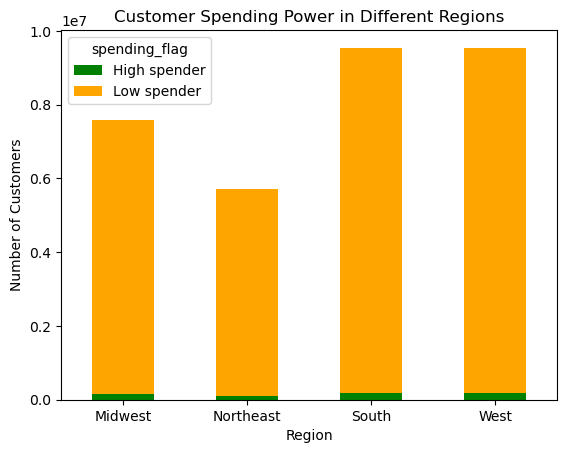

In [10]:
# Plot the data using a bar chart
colors = ['green', 'orange']
bar_spender_region = df_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Export the chart outside of Jupyter in the form of image file
bar_spender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region.png'))

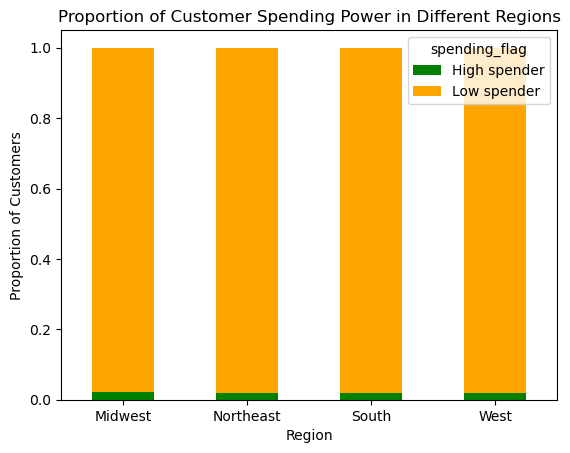

In [12]:
# To analyze the proportions of high and low spender in each region
df_prop_grouped = df_grouped.div(df_grouped.sum(axis = 1), axis = 0)
bar_spender_region_prop = df_prop_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Export the chart outside of Jupyter in the form of image file
bar_spender_region_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region_prop.png'))

The bar charts demonstrates that the customer behaviour (spendign power in this regard) was very similar among four regions. The amount of low spenders was much more than that of high spenders countrywide, and the proportion of high spender in each region was therefore very low.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

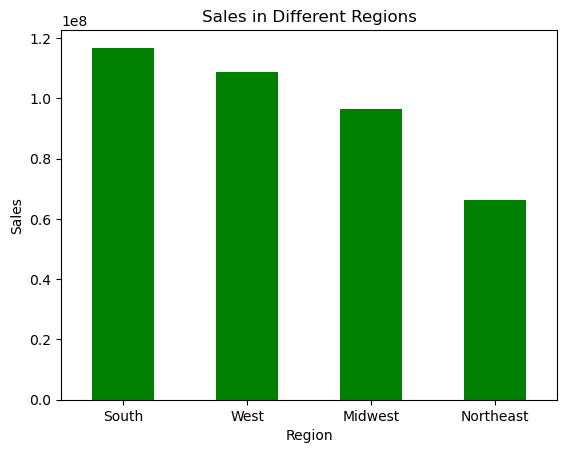

In [14]:
bar_sales_region = ords_prods_customers.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(title = 'Sales in Different Regions', xlabel = 'Region', ylabel = 'Sales', color = 'green')
plt.xticks(rotation = 0)

In [15]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_region.png'))

## Step 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
# Create a new column with max_order
ords_prods_customers['max_order'] = ords_prods_customers.groupby(['user_id'])['order_number'].transform('max')

In [17]:
# Create the flag based on the criteria
ords_prods_customers.loc[ords_prods_customers['max_order'] < 5, 'low_activity'] = 'True'
ords_prods_customers.loc[ords_prods_customers['max_order'] >= 5, 'low_activity'] = 'False'

C:\Users\dequw\AppData\Local\Temp\ipykernel_6108\2119228770.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_customers.loc[ords_prods_customers['max_order'] < 5, 'low_activity'] = 'True'


In [18]:
ords_prods_customers['low_activity'].value_counts()

low_activity
False    30964564
True      1440295
Name: count, dtype: int64

In [19]:
# Create a new data set which only contains active customers (orders >= 5)
ords_prods_customers_active = ords_prods_customers[ords_prods_customers['low_activity'] == 'False']

In [20]:
ords_prods_customers_active.shape

(30964564, 37)

In [21]:
# Export the new dataset with only active customers
ords_prods_customers_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_active.pkl'))

## Step 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Answering questions based on the project brief:

# Question 1: What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

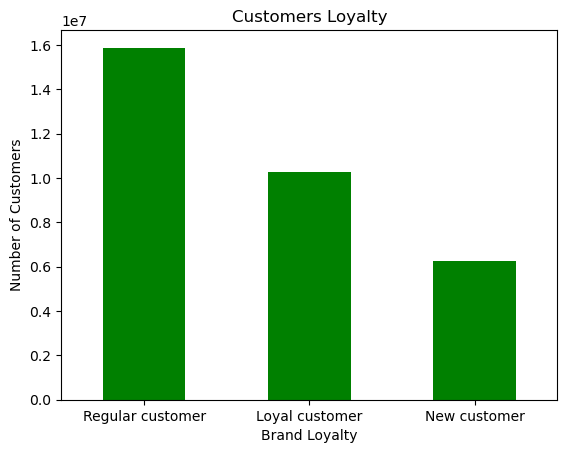

In [22]:
# Create a bar chart showing the number of orders regarding their brand loyalty
bar_orders_loyalty = ords_prods_customers['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Brand Loyalty', ylabel = 'Number of Customers', color = 'green')
plt.xticks(rotation=0)

In [23]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

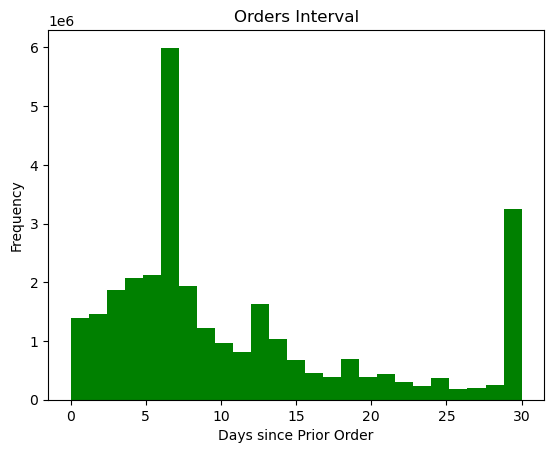

In [24]:
# Create a histogram to check how often do our customers return to Instacart?
hist_orders_interval = ords_prods_customers['orders_interval'].plot.hist(bins = 25, title = 'Orders Interval', xlabel = 'Days since Prior Order', color = 'green')

In [25]:
# Export the chart outside of Jupyter in the form of image file
hist_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_interval.png'))

# Question 2: Are there differences in ordering habits based on a customer’s loyalty status?

ordering habit - orders interval

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

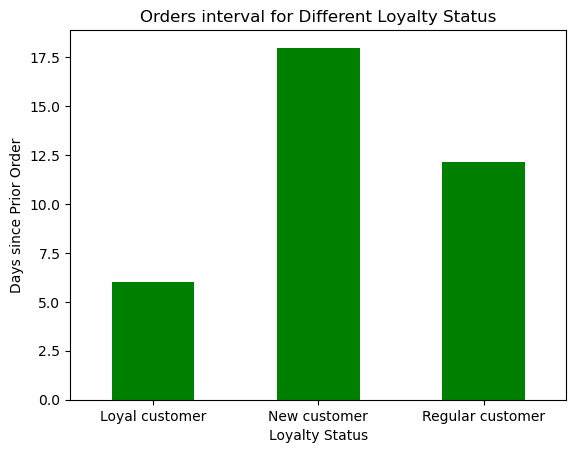

In [26]:
bar_orders_interval_loyalty = ords_prods_customers.groupby('loyalty_flag')['orders_interval'].mean().plot.bar(title = 'Orders interval for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days since Prior Order', color = 'green')
plt.xticks(rotation=0)

In [27]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_interval_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_interval_loyalty.png'))

ordering habit - price of orders

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

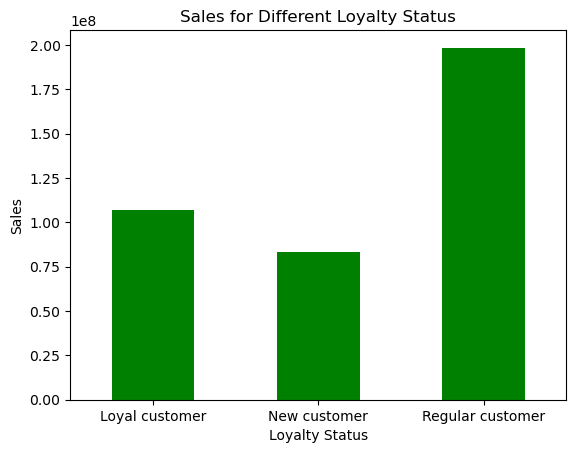

In [28]:
bar_sales_loyalty = ords_prods_customers.groupby('loyalty_flag')['prices'].sum().plot.bar(title = 'Sales for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Sales', color = 'green')
plt.xticks(rotation=0)

In [29]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_loyalty.png'))

ordering habit - which days of week had most orders?

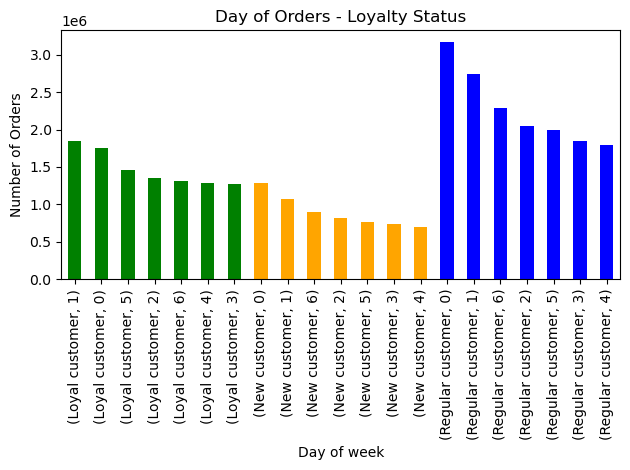

In [30]:
bar_dow_loyalty = ords_prods_customers.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()

In [31]:
ords_prods_customers.groupby('loyalty_flag')['orders_day_of_week'].value_counts()

loyalty_flag      orders_day_of_week
Loyal customer    1                     1843401
                  0                     1754731
                  5                     1456715
                  2                     1352343
                  6                     1318366
                  4                     1292042
                  3                     1266495
New customer      0                     1280451
                  1                     1067446
                  6                      895745
                  2                      814412
                  5                      759780
                  3                      731417
                  4                      694739
Regular customer  0                     3169000
                  1                     2749383
                  6                     2282379
                  2                     2047075
                  5                     1989296
                  3                     1842622
   

In [32]:
# Export the chart outside of Jupyter in the form of image file
bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyalty.png'))

ordering habit - what time of the day had most orders?

In [33]:
# Create a dataframe of order_hour_of_day of different loyalty customers
df_oh_loyalty = ords_prods_customers.groupby('loyalty_flag')['order_hour_of_day'].value_counts()

In [34]:
# Check the top 3 ordering hours of New customer
df_oh_loyalty['New customer'].head(3)

order_hour_of_day
15    540461
13    531525
14    531180
Name: count, dtype: int64

In [35]:
# Check the top 3 ordering hours of Regular customer
df_oh_loyalty['Regular customer'].head(3)

order_hour_of_day
11    1339172
10    1329666
14    1322794
Name: count, dtype: int64

In [36]:
# Check the top 3 ordering hours of Loyal customer
df_oh_loyalty['Loyal customer'].head(3)

order_hour_of_day
10    937669
9     882740
11    873024
Name: count, dtype: int64

Ordering habit - which department has the high numer of orders?

In [37]:
# create a column called 'result' to indicate department name
result = []

for value in ords_prods_customers["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alchol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")   
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")

In [38]:
ords_prods_customers['department_name'] = result

In [39]:
ords_prods_customers['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alchol              153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [40]:
ords_prods_customers['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [41]:
# Create a dataframe to group the data by 'department_name' and 'loyalty_flag'
df_grouped_dep_loyal = ords_prods_customers.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [42]:
df_grouped_dep_loyal.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alchol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094


In [43]:
df_grouped_dep_loyal_sort = df_grouped_dep_loyal.sort_values(by = 'Regular customer', ascending = False)

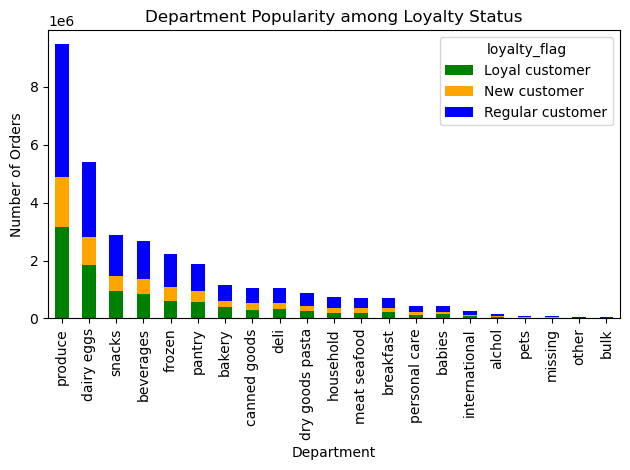

In [44]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue']
bar_dep_loyalty = df_grouped_dep_loyal_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [45]:
# Export the chart outside of Jupyter in the form of image file
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

In [46]:
df_oh_dep_loyalty = ords_prods_customers.groupby('loyalty_flag')['department_name'].value_counts()

In [47]:
# Check top 3 sold departments of each loyalty status
df_oh_dep_loyalty['New customer'].head(3)

department_name
produce       1736622
dairy eggs     971621
snacks         534251
Name: count, dtype: int64

In [48]:
df_oh_dep_loyalty['Regular customer'].head(3)

department_name
produce       4595293
dairy eggs    2596419
snacks        1410149
Name: count, dtype: int64

In [49]:
df_oh_dep_loyalty['Loyal customer'].head(3)

department_name
produce       3147376
dairy eggs    1830707
snacks         943150
Name: count, dtype: int64

# Question 3: Are there differences in ordering habits based on a customer’s region?

ordering habit - orders interval

In [50]:
ords_prods_customers.groupby('region')['orders_interval'].mean()

region
Midwest      11.181836
Northeast    11.075769
South        11.107460
West         11.055819
Name: orders_interval, dtype: float64

In [ ]:
ordering habit - price of orders

In [51]:
ords_prods_customers.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715483  1.0  99999.0
Northeast  11.554997  1.0  99999.0
South      12.242415  1.0  99999.0
West       11.387752  1.0  99999.0

ordering habit - which days of week had most orders?

In [53]:
ords_prods_customers.groupby('region')['orders_day_of_week'].value_counts()

region     orders_day_of_week
Midwest    0                     1460186
           1                     1320759
           6                     1058124
           2                      991770
           5                      983262
           3                      895093
           4                      888131
Northeast  0                     1097258
           1                      999953
           6                      787283
           5                      746455
           2                      746153
           3                      679308
           4                      666326
South      0                     1811727
           1                     1674164
           6                     1322347
           2                     1241549
           5                     1237259
           3                     1139378
           4                     1115012
West       0                     1835011
           1                     1665354
           6               

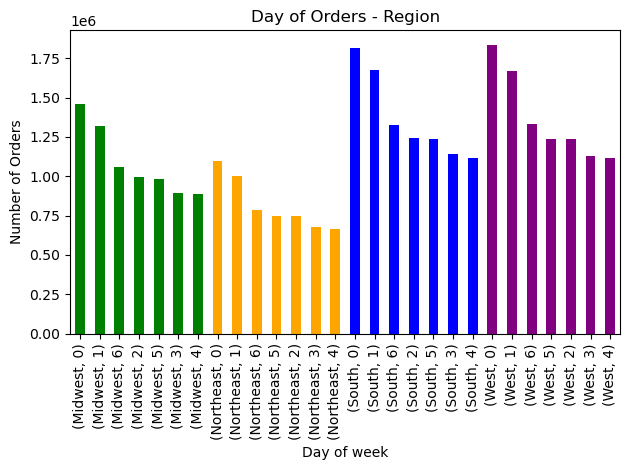

In [54]:
bar_dow_region = ords_prods_customers.groupby('region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Region', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.tight_layout()

In [55]:
# Export the chart outside of Jupyter in the form of image file
bar_dow_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_region.png'))

ordering habit - what time of the day had most orders?

In [56]:
# Create a dataframe of order_hour_of_day of different regions
df_oh_region = ords_prods_customers.groupby('region')['order_hour_of_day'].value_counts()

In [57]:
# Check the top 3 ordering hours of Midwest
df_oh_region['Midwest'].head(3)

order_hour_of_day
10    646591
11    641858
15    628164
Name: count, dtype: int64

In [58]:
# Check the top 3 ordering hours of Northeast
df_oh_region['Northeast'].head(3)

order_hour_of_day
10    484872
11    482845
14    475355
Name: count, dtype: int64

In [59]:
# Check the top 3 ordering hours of South
df_oh_region['South'].head(3)

order_hour_of_day
10    815800
11    805198
14    790485
Name: count, dtype: int64

In [60]:
# Check the top 3 ordering hours of West
df_oh_region['West'].head(3)

order_hour_of_day
10    814497
11    806239
14    798174
Name: count, dtype: int64

Ordering habit - which department has the high numer of orders?

In [62]:
# Create a dataframe to group the data by 'department_name' and 'region'
df_grouped_dep_region = ords_prods_customers.groupby(['department_name', 'region']).size().unstack()

In [63]:
df_grouped_dep_region_sort = df_grouped_dep_region.sort_values(by = 'South', ascending = False)

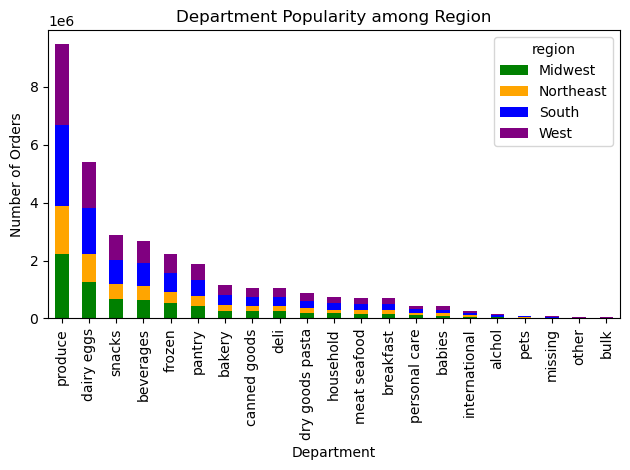

In [64]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue', 'purple']
bar_dep_region = df_grouped_dep_region_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [65]:
# Export the chart outside of Jupyter in the form of image file
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_region.png'))

# Question 4: Is there a connection between age and family status in terms of ordering habits?

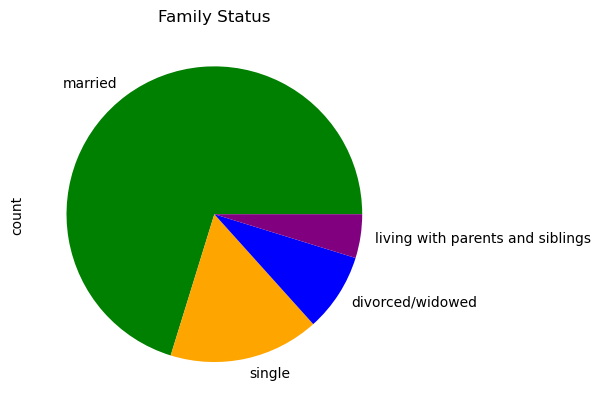

In [66]:
# Check the family status frequency
pie_fam_status = ords_prods_customers['fam_status'].value_counts().plot.pie(title = 'Family Status', colors = ['green', 'orange', 'blue', 'purple'])

In [67]:
# Export the chart outside of Jupyter in the form of image file
pie_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

In [68]:
# Check the age stats for different family status
ords_prods_customers.groupby('fam_status').agg({'age': ['mean', 'min', 'max']})

age        
                                       mean min max
fam_status                                         
divorced/widowed                  70.513004  60  81
living with parents and siblings  19.503707  18  21
married                           51.486493  22  81
single                            38.597507  18  59

Observations of investigating the family status of our customers: Most of our customers (70%) are married, I therefore would further investigate the married group.

In [69]:
# Divide the customers into 3 age groups:

In [70]:
age_bins = [18, 40, 60, float('inf')] 
age_labels = ['Young', 'Middle', 'Old']

In [71]:
ords_prods_customers['age_flag'] = np.select(
    [(ords_prods_customers['age'] >= 18) & (ords_prods_customers['age'] < 40), (ords_prods_customers['age'] >= 40) & (ords_prods_customers['age'] < 60), ords_prods_customers['age'] >= 60],
    age_labels,
    default=np.nan
)

In [72]:
ords_prods_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,orders_interval,first_order,product_id,add_to_cart_order,...,age,date_joined,n_dependants,fam_status,income,_merge,region,low_activity,department_name,age_flag
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,31,2/17/2019,3,married,40423,both,South,False,beverages,Young
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,31,2/17/2019,3,married,40423,both,South,False,beverages,Young
2,473747,1,prior,3,3,12,21.0,False,196,1,...,31,2/17/2019,3,married,40423,both,South,False,beverages,Young
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,31,2/17/2019,3,married,40423,both,South,False,beverages,Young
4,431534,1,prior,5,4,15,28.0,False,196,1,...,31,2/17/2019,3,married,40423,both,South,False,beverages,Young


Ordering habit - Age groups

In [73]:
ords_prods_customers.groupby('age_flag')['order_number'].sum()

age_flag
Middle    174384437
Old       189425197
Young     191684331
Name: order_number, dtype: int64

In [74]:
ords_prods_customers.groupby('age_flag')['prices'].sum()

age_flag
Middle    123350445.0
Old       130187838.2
Young     134679239.4
Name: prices, dtype: float64

Ordering habit - Family status and age groups

In [75]:
# Create a dataframe to group the data by 'fam_status' and 'age_flag'
df_grouped_fam_age = ords_prods_customers.groupby(['fam_status', 'age_flag']).size().unstack()

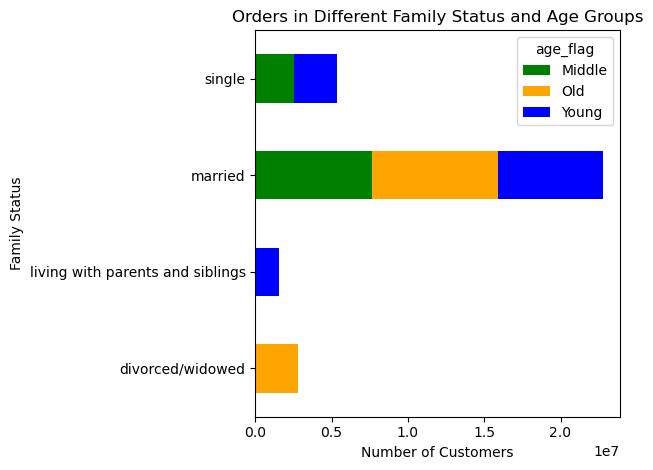

In [76]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue']
bar_fam_age = df_grouped_fam_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()

In [77]:
# Export the chart outside of Jupyter in the form of image file
bar_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age.png'))

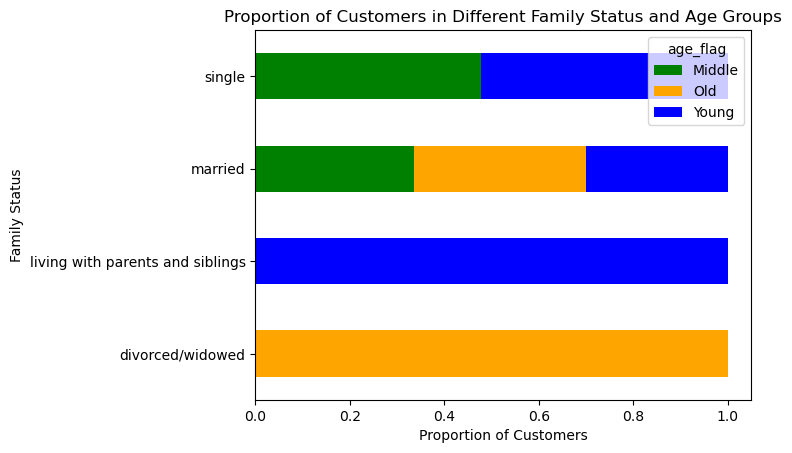

In [78]:
# To analyze the proportions 
df_prop_grouped_fam_age = df_grouped_fam_age.div(df_grouped_fam_age.sum(axis = 1), axis = 0)
bar_fam_age_prop = df_prop_grouped_fam_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Proportion of Customers in Different Family Status and Age Groups')
plt.xlabel('Proportion of Customers')
plt.ylabel('Family Status')

plt.show()

In [79]:
# Export the chart outside of Jupyter in the form of image file
bar_fam_age_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age_prop.png'))

In [ ]:
Ordering habit - Loyalty and age groups

In [80]:
# Create a dataframe to group the data by 'age_flag' and 'loyalty_flag'
df_grouped_loyal_age = ords_prods_customers.groupby(['age_flag', 'loyalty_flag']).size().unstack()

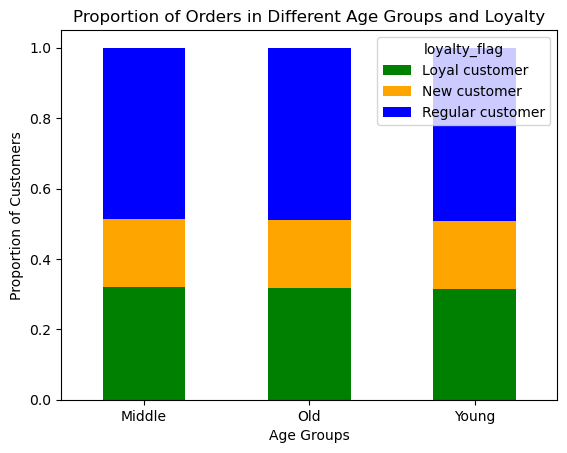

In [81]:
# To analyze the proportions in a bar chart
colors = ['green', 'orange', 'blue']
df_prop_grouped_loyal_age = df_grouped_loyal_age.div(df_grouped_loyal_age.sum(axis = 1), axis = 0)
bar_age_loyalty_prop = df_prop_grouped_loyal_age.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Orders in Different Age Groups and Loyalty')
plt.xlabel('Age Groups')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [82]:
# Export the chart outside of Jupyter in the form of image file
bar_age_loyalty_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty_prop.png'))

## Question 5 & Question 6: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status? & What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

# income

In [83]:
# Create a flag indicating different groups of income
ords_prods_customers['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [84]:
# Create a new column with avg_income
ords_prods_customers['avg_income'] = ords_prods_customers.groupby(['user_id'])['income'].transform('mean')

In [85]:
# Create the flag based on the criteria
ords_prods_customers.loc[ords_prods_customers['avg_income'] > 128000, 'income_flag'] = 'High income'

C:\Users\dequw\AppData\Local\Temp\ipykernel_6108\3740930534.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_customers.loc[ords_prods_customers['avg_income'] > 128000, 'income_flag'] = 'High income'


In [86]:
ords_prods_customers.loc[(ords_prods_customers['avg_income'] <= 128000) & (ords_prods_customers['avg_income'] > 67000), 'income_flag'] = 'Middle income'

In [87]:
ords_prods_customers.loc[ords_prods_customers['avg_income'] <= 67000, 'income_flag'] = 'Low income'

In [88]:
ords_prods_customers['income_flag'].value_counts(dropna = False)

income_flag
Middle income    16221856
Low income        8100799
High income       8082204
Name: count, dtype: int64

In [89]:
ords_prods_customers.groupby('income_flag')['prices'].mean()

income_flag
High income      22.076865
Low income        7.291474
Middle income     9.291232
Name: prices, dtype: float64

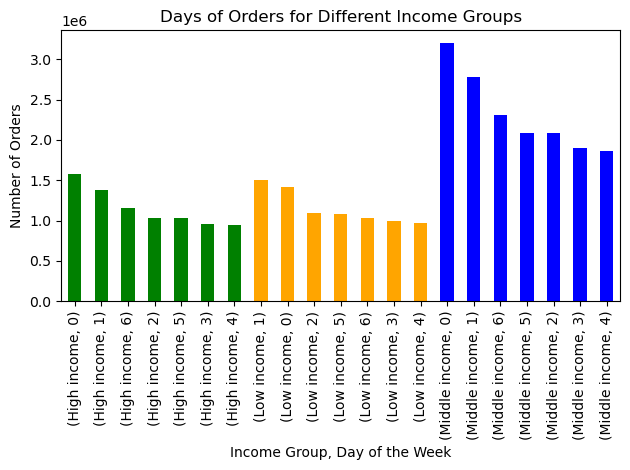

In [90]:
bar_orders_income = ords_prods_customers.groupby('income_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Days of Orders for Different Income Groups', xlabel = 'Income Group, Day of the Week', ylabel = 'Number of Orders', color = ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()

In [91]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_income.png'))

## Number of Dependants

In [92]:
# Create a depend_flag to indicate whether the customers have dependants or not
ords_prods_customers['avg_dependant'] = ords_prods_customers.groupby(['user_id'])['n_dependants'].transform('mean')

In [93]:
ords_prods_customers.loc[ords_prods_customers['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'

C:\Users\dequw\AppData\Local\Temp\ipykernel_6108\2645912077.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_customers.loc[ords_prods_customers['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'


In [94]:
ords_prods_customers.loc[ords_prods_customers['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'

In [95]:
ords_prods_customers['depend_flag'].value_counts(dropna = False)

depend_flag
With Dependants       24307356
Without Dependants     8097503
Name: count, dtype: int64

In [ ]:
# Customer Profile: Age + Income + Dependants

In [96]:
# Create a customer profile variable incl. age, income and dependants 
ords_prods_customers['customer_profile'] = ords_prods_customers['age_flag'] + '_' + ords_prods_customers['income_flag'] + '_' + ords_prods_customers['depend_flag'] 

In [97]:
#Customer Profile - Sales

In [98]:
customer_profile_prices_sum = ords_prods_customers.groupby('customer_profile')['prices'].sum()

In [99]:
customer_profile_prices_sum_sorted = customer_profile_prices_sum.sort_values(ascending=False)

In [100]:
gradient_colors = plt.cm.Greens(np.linspace(0.8, 0.3, len(customer_profile_prices_sum_sorted)))

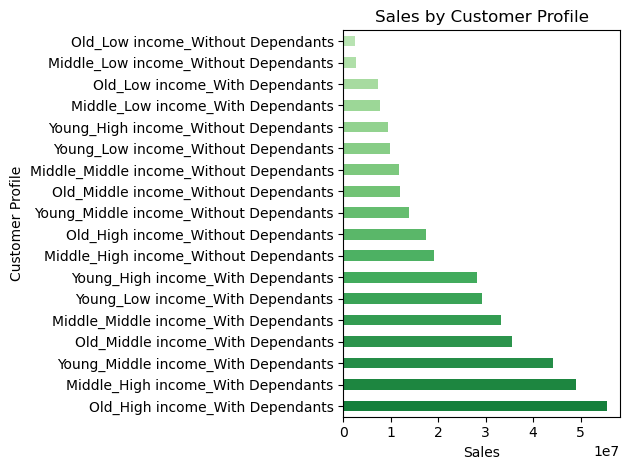

In [101]:
bar_customer_profile_sales = customer_profile_prices_sum_sorted.plot.barh(title = 'Sales by Customer Profile', xlabel = 'Sales', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [102]:
# Export the chart outside of Jupyter in the form of image file
bar_customer_profile_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_sales.png'))

Customer Profile - Orders Interval

In [103]:
# Orders interval
customer_profile_ordint_mean = ords_prods_customers.groupby('customer_profile')['orders_interval'].mean()

In [104]:
customer_profile_ordint_mean_sorted = customer_profile_ordint_mean.sort_values(ascending=True)

In [105]:
gradient_colors = plt.cm.Greens(np.linspace(0.3, 0.8, len(customer_profile_ordint_mean_sorted)))

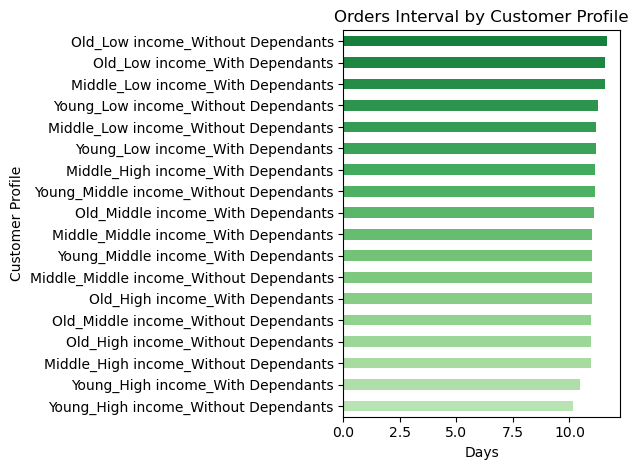

In [106]:
bar_customer_profile_orders_interval = customer_profile_ordint_mean_sorted.plot.barh(title = 'Orders Interval by Customer Profile', xlabel = 'Days', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [107]:
# Export the chart outside of Jupyter in the form of image file
bar_customer_profile_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_orders_interval.png'))

Findings: with dependants, high and middle income had high sales independent of age groups. --> so investigate these customers favourite departments.

In [108]:
# Select these customers using conditions
condition1 = ords_prods_customers['customer_profile'] == 'Young_High income_With Dependants'
condition2 = ords_prods_customers['customer_profile'] == 'Middle_High income_With Dependants'
condition3 = ords_prods_customers['customer_profile'] == 'Old_High income_With Dependants'
condition4 = ords_prods_customers['customer_profile'] == 'Young_Middle income_With Dependants'
condition5 = ords_prods_customers['customer_profile'] == 'Middle_Middle income_With Dependants'
condition6 = ords_prods_customers['customer_profile'] == 'Old_Middle income_With Dependants'

In [109]:
# Create a dataframe including these customers
df_customer_profile_selected = ords_prods_customers[condition1 | condition2 | condition3 |condition4 | condition5 | condition6]

In [110]:
# Check the popular departments for these selected groups
df_grouped_pop_dep = df_customer_profile_selected.groupby(['department_name', 'customer_profile']).size().unstack()

In [111]:
df_grouped_pop_dep_sort = df_grouped_pop_dep.sort_values(by = 'Old_High income_With Dependants', ascending = False)

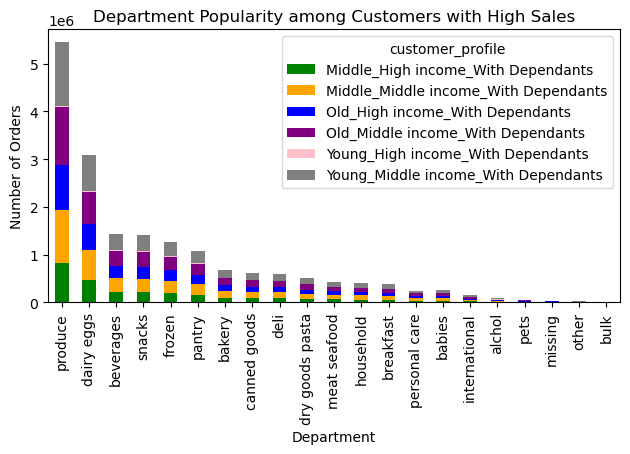

In [112]:
colors = ['green', 'orange', 'blue', 'purple', 'pink', 'grey']
bar_customer_profile_pop_dep = df_grouped_pop_dep_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Customers with High Sales')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [113]:
# Export the chart outside of Jupyter in the form of image file
bar_customer_profile_pop_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_pop_dep.png'))

## Additional Steps

## Question 2: Whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

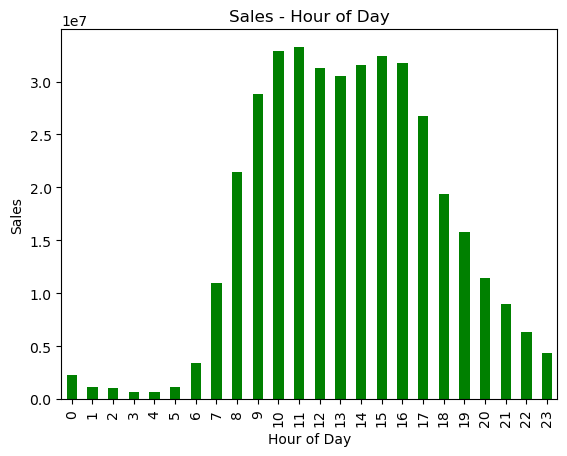

In [115]:
bar_sales_hod = ords_prods_customers.groupby('order_hour_of_day')['prices'].sum().plot.bar(title = 'Sales - Hour of Day', xlabel = 'Hour of Day', ylabel = 'Sales', color = 'green')

In [116]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_hod.png'))

# Question 3

(array([0, 1, 2]),
 [Text(0, 0, 'Mid range product'),
  Text(1, 0, 'Low range prodcut'),
  Text(2, 0, 'High range product')])

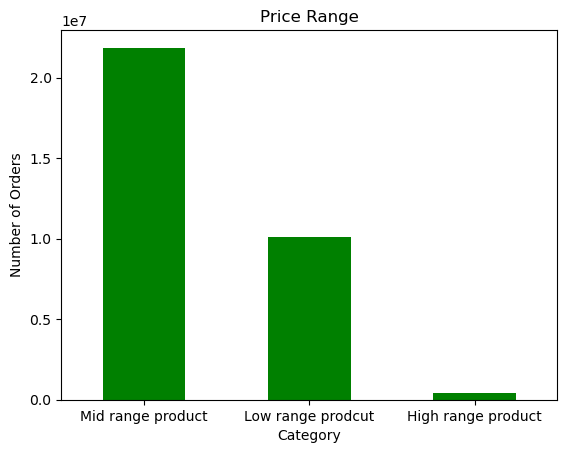

In [117]:
bar_price_range = ords_prods_customers['price_range_loc'].value_counts(dropna = False).plot.bar(title = 'Price Range', xlabel = 'Category', ylabel = 'Number of Orders', color = 'green')
plt.xticks(rotation=0)

In [118]:
# Export the chart outside of Jupyter in the form of image file
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

## Question 4 

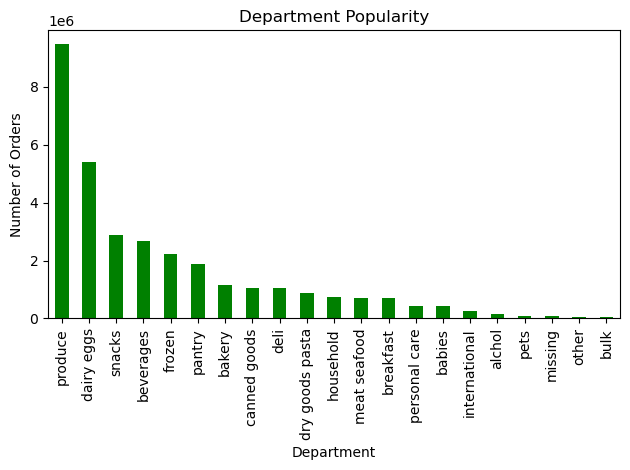

In [119]:
bar_depart_pop = ords_prods_customers['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = 'green')
plt.tight_layout()

In [120]:
# Export the chart outside of Jupyter in the form of image file
bar_depart_pop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_pop.png'))

In [121]:
# Export the final file
ords_prods_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))